# Import library

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook

# Read data in online_activity_test_.csv

In [2]:
data = pd.read_csv('online_activity_test_.csv')

In [3]:
data.head()

,member_id,browser_id,register_id,date_time,url
0,NaN,3.020000e+37,NaN,2020-08-08T19:09:26.000Z,NaN
1,5.443924e+09,4.830000e+37,NaN,2020-08-08T19:53:48.000Z,www:/money/taxes/info-2020/states-that-dont-ta...
2,NaN,4.830000e+37,NaN,2020-08-08T19:32:18.000Z,games:/games/bubble-dragons
3,5.131951e+09,3.050000e+37,34999201.0,2020-08-08T19:03:08.000Z,games:/games/forty-thieves-solitaire
4,1.473905e+09,4.860000e+37,94842213.0,2020-08-08T19:37:28.000Z,games:/games/mahjongg-solitaire


# Analysing data( mean, standard variation, min, max, count)

1.	What’s general statistics you can get from the table? (Example: total counts of members/non-members from first column, means, range, % distribution, etc.)

In [4]:
data.describe()

,member_id,browser_id,register_id
count,3.587000e+03,1.000000e+04,2.809000e+03
mean,4.335833e+09,3.627784e+37,7.055831e+07
std,1.316784e+09,2.434658e+37,3.362299e+07
min,0.000000e+00,1.210000e+18,6.125200e+04
25%,4.043162e+09,1.460000e+37,3.954276e+07
50%,4.744639e+09,3.540000e+37,8.988792e+07
75%,5.186028e+09,5.300000e+37,9.668884e+07
max,3.216303e+10,9.220000e+37,1.005760e+08


In [5]:
data[data.columns[0]].describe()

count    3.587000e+03
mean     4.335833e+09
std      1.316784e+09
min      0.000000e+00
25%      4.043162e+09
50%      4.744639e+09
75%      5.186028e+09
max      3.216303e+10
Name: member_id, dtype: float64

In [6]:
data[data.columns[1]].describe()

count    1.000000e+04
mean     3.627784e+37
std      2.434658e+37
min      1.210000e+18
25%      1.460000e+37
50%      3.540000e+37
75%      5.300000e+37
max      9.220000e+37
Name: browser_id, dtype: float64

In [7]:
data[data.columns[2]].describe()

count    2.809000e+03
mean     7.055831e+07
std      3.362299e+07
min      6.125200e+04
25%      3.954276e+07
50%      8.988792e+07
75%      9.668884e+07
max      1.005760e+08
Name: register_id, dtype: float64

In [8]:
data[data.columns[3]].describe()

count                        10000
unique                        9172
top       2020-09-09T18:54:39.000Z
freq                             4
Name: date_time, dtype: object

In [9]:
data[data.columns[4]].describe()

count                               5587
unique                              1375
top       games:/games/classic-solitaire
freq                                 192
Name: url, dtype: object

# Plot frequency of each columns

<AxesSubplot:title={'center':'frequency members'}, ylabel='Frequency'>

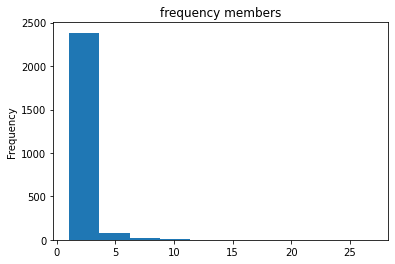

In [10]:
data[data.columns[0]].value_counts().plot(kind='hist', title='frequency members')

<AxesSubplot:title={'center':'frequency members accessed brower'}, ylabel='Frequency'>

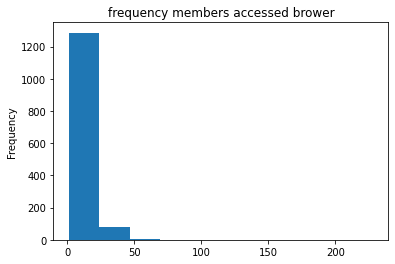

In [11]:
data[data.columns[1]].value_counts().plot(kind='hist', title='frequency members accessed brower' )

<AxesSubplot:title={'center':'frequency members by register_id'}, ylabel='Frequency'>

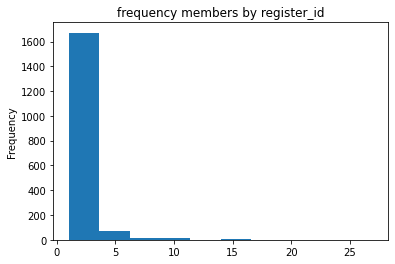

In [12]:
data[data.columns[2]].value_counts().plot(kind='hist', title='frequency members by register_id')

<AxesSubplot:title={'center':'frequency members by website'}, ylabel='Frequency'>

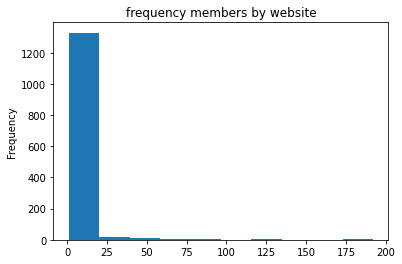

In [13]:
data[data.columns[4]].value_counts().plot(kind='hist', title='frequency members by website')

# 2.	Generate these new variables for each individual (members or non-members) based on existing five columns:


•	Average clicks in the past 7 days

•	Average clicks in the past 30 days

•	Time spent on website (average mins per day).

        In digital area, all clicks within 30mins are counted as the one visit. So to get time spent, we assume if the person still clicks within 30mins, he/she is still browsing sites. For example, the person clicked at 1:00, 1:10, 1:20, 2:00, and 2:05. It means the person had two visits. Visit 1, he spent 20mins (1:00-1:20). Visit 2, he spent 5 mins (2:00-2:05). Total time spent is 25mins.
 
•	Web content channel each person clicked (by using url column)


# convert date time with string format to date_time

In [14]:
data['date_time'] = pd.to_datetime(data['date_time'], format='%Y-%m-%d %H:%M:%S')

# Set date_time series to index

In [15]:
data = data.set_index(['date_time'])

In [16]:
data

,member_id,browser_id,register_id,url
date_time,,,,
2020-08-08 19:09:26+00:00,NaN,3.020000e+37,NaN,NaN
2020-08-08 19:53:48+00:00,5.443924e+09,4.830000e+37,NaN,www:/money/taxes/info-2020/states-that-dont-ta...
2020-08-08 19:32:18+00:00,NaN,4.830000e+37,NaN,games:/games/bubble-dragons
2020-08-08 19:03:08+00:00,5.131951e+09,3.050000e+37,34999201.0,games:/games/forty-thieves-solitaire
2020-08-08 19:37:28+00:00,1.473905e+09,4.860000e+37,94842213.0,games:/games/mahjongg-solitaire
...,...,...,...,...
2020-10-07 00:05:47+00:00,NaN,9.360000e+35,NaN,NaN
2020-10-07 00:19:40+00:00,NaN,1.420000e+35,NaN,NaN
2020-10-07 00:14:35+00:00,NaN,1.700000e+36,NaN,NaN


# Get data 7 days( in October)

In [17]:
data.loc['2020-10']

,member_id,browser_id,register_id,url
date_time,,,,
2020-10-07 00:21:05+00:00,NaN,4.030000e+19,NaN,NaN
2020-10-07 00:08:07+00:00,NaN,1.550000e+35,NaN,games:/games/classic-solitaire
2020-10-07 00:26:04+00:00,NaN,5.880000e+35,NaN,games:/games/scramble-words
2020-10-07 00:03:00+00:00,NaN,1.020000e+36,NaN,help:/s
2020-10-07 00:27:06+00:00,NaN,1.120000e+36,NaN,www:/espanol/salud/enfermedades-y-tratamientos...
...,...,...,...,...
2020-10-07 00:05:47+00:00,NaN,9.360000e+35,NaN,NaN
2020-10-07 00:19:40+00:00,NaN,1.420000e+35,NaN,NaN
2020-10-07 00:14:35+00:00,NaN,1.700000e+36,NaN,NaN


# Count avarage clicks in 7 days

In [18]:
data.loc['2020-10'].groupby('member_id').count()

,browser_id,register_id,url
member_id,,,
1.494339e+09,1,1,1
1.573928e+09,1,1,1
1.574918e+09,1,1,1
1.595560e+09,1,1,1
1.598820e+09,1,1,1
...,...,...,...
5.587037e+09,1,1,0
5.606023e+09,2,0,0
5.608787e+09,1,0,1


# Get data in 30 days

In [19]:
data.loc['2020-09-07':'2020-10-07']

,member_id,browser_id,register_id,url
date_time,,,,
2020-09-12 02:41:09+00:00,NaN,6.020000e+37,NaN,NaN
2020-09-12 02:46:58+00:00,NaN,6.020000e+37,NaN,NaN
2020-09-12 02:48:26+00:00,NaN,6.020000e+37,NaN,NaN
2020-09-12 02:49:11+00:00,NaN,6.020000e+37,NaN,NaN
2020-09-12 02:48:24+00:00,5.606521e+09,6.150000e+37,100435882.0,secure:/applications/user/membershipSuccess
...,...,...,...,...
2020-10-07 00:05:47+00:00,NaN,9.360000e+35,NaN,NaN
2020-10-07 00:19:40+00:00,NaN,1.420000e+35,NaN,NaN
2020-10-07 00:14:35+00:00,NaN,1.700000e+36,NaN,NaN


# Count avarage clicks in 30 days

In [20]:
data.loc['2020-09-07':'2020-10-07'].groupby('member_id').count()

,browser_id,register_id,url
member_id,,,
1.243126e+09,2,0,1
1.376450e+09,1,0,1
1.407824e+09,1,1,0
1.426619e+09,1,0,1
1.426634e+09,2,2,2
...,...,...,...
5.608532e+09,1,0,0
5.608536e+09,2,1,1
5.608787e+09,1,0,1


# Time spent on website (average mins per day).

In [63]:
days = data.index.floor('D').value_counts()
days = days.index
data_copy = data

In [64]:
days

DatetimeIndex(['2020-06-17 00:00:00+00:00', '2020-08-28 00:00:00+00:00',
               '2020-09-22 00:00:00+00:00', '2020-09-15 00:00:00+00:00',
               '2020-08-05 00:00:00+00:00', '2020-09-12 00:00:00+00:00',
               '2020-09-02 00:00:00+00:00', '2020-05-16 00:00:00+00:00',
               '2020-08-08 00:00:00+00:00', '2020-05-30 00:00:00+00:00',
               '2020-06-06 00:00:00+00:00', '2020-05-18 00:00:00+00:00',
               '2020-09-29 00:00:00+00:00', '2020-08-18 00:00:00+00:00',
               '2020-07-11 00:00:00+00:00', '2020-07-21 00:00:00+00:00',
               '2020-09-09 00:00:00+00:00', '2020-07-01 00:00:00+00:00',
               '2020-07-18 00:00:00+00:00', '2020-10-07 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [ ]:
times = []
for day in tqdm_notebook(days):
    time_day = []
    data_day = data.loc[str(day).split(' ')[0]]
    for member in data_day['member_id']:
        if member == np.nan:
            times.append(0)
            continue
        temp = data_day[data_day['member_id']==member]
        if len(temp) < 2:
            times.append(0)
        else:
            temp = temp.sort_index()
            start = temp.index[0]
            
            hour_start = int(str(start).split(' ')[-1].split(':')[0])
            m_start = int(str(start).split(' ')[-1].split(':')[1])
            s_start = int(str(start).split(' ')[-1].split(':')[-1].split('+')[0])
#             end = temp.index[-1]
            app = []
            for k, end in enumerate(temp.index):
                if k == 0:
                    continue
                hour_end = int(str(end).split(' ')[-1].split(':')[0])
                m_end = int(str(end).split(' ')[-1].split(':')[1])
                s_end = int(str(end).split(' ')[-1].split(':')[-1].split('+')[0])
                app.append((hour_end*3600+ m_end*60+s_end )-(hour_start*3600+ m_start*60+s_start ))
            if len(app) == 1:
                times.append(app[0])
                continue
            new_list = []
            sum = 0
            tig = False
            for k ,val in enumerate(app):
                ix = 0
                if val - app[ix] >30*60:
                    if tig:
                        sum+= val - app[ix]
                    else:
                        sum+=app[k-1]
                        ix = k
                    tig = True
            if not tig:
                sum = app[-1]
            times.append(sum)
#             print(new_list)
# data_copy['second_per_day'] = times

In [90]:
max(times)

5520

In [24]:
data_copy.head()

,member_id,browser_id,register_id,url,second_per_day
date_time,,,,,
2020-08-08 19:09:26+00:00,NaN,3.020000e+37,NaN,NaN,660
2020-08-08 19:53:48+00:00,5.443924e+09,4.830000e+37,NaN,www:/money/taxes/info-2020/states-that-dont-ta...,0
2020-08-08 19:32:18+00:00,NaN,4.830000e+37,NaN,games:/games/bubble-dragons,0
2020-08-08 19:03:08+00:00,5.131951e+09,3.050000e+37,34999201.0,games:/games/forty-thieves-solitaire,0
2020-08-08 19:37:28+00:00,1.473905e+09,4.860000e+37,94842213.0,games:/games/mahjongg-solitaire,0


# Web content channel each person clicked (by using url column)

In [25]:
data.groupby('url').count()

,member_id,browser_id,register_id,second_per_day
url,,,,
aarp:/Events/Register/GroupReg.aspx,0,2,0,2
aarp:/Events/Register/InformationPage.aspx,0,1,0,1
aarp:/event/3e200b2f-57ea-4857-a54f-c5d1394cae81/regProcessStep1,0,1,0,1
aarp:/events/Registrations/MyRegistration.aspx,0,2,0,2
aarp:/events/aarp-co-arvada-center-virtual-music-series-oct-nov-2020/event-summary-21acd784ade04defb0f7c2c8f78f8737.aspx,0,1,0,1
...,...,...,...,...
www:/work/working-at-50-plus/info-2020/coronavirus-delay-retirement.html,0,1,0,1
www:/work/working-at-50-plus/info-2020/coronavirus-early-retirement.html,0,1,0,1
www:/work/working-at-50-plus/info-2020/lgbt-supreme-court-ruling.html,0,1,0,1


# 3.	Answer these questions:


•	Which content channel on the website people visited most?

•	Pick two web contents and find out different profiles of these two groups of visitors. For example, assuming Health and Member Benefits are two popular web contents. Can you find out different web behaviors (such as total number of clicks) or different distributions (such as % of members or % of registrants) from visitors who visited these two channels? 


•	To build a predictive model to target certain group of online visitors, we need a better set of data to describe individual’s web behaviors (more than variables from question 2). What else variables you can create from the existing five (dummy, numeric or characteristic variables derived from these five)?


# Which content channel on the website people visited most?

In [26]:
data.groupby('url').count().sort_values(['browser_id'], ascending=False)

,member_id,browser_id,register_id,second_per_day
url,,,,
games:/games/classic-solitaire,71,192,56,192
games:/games/mahjongg-solitaire,56,189,39,189
games:,53,133,41,133
games:/games/klondike-solitaire,44,131,37,131
games:/games/10-by-10,36,124,32,124
...,...,...,...,...
www:/health/conditions-treatments/info-02-2013/high-blood-pressure-quiz.html#quest6,1,1,1,1
www:/health/conditions-treatments/info-03-2013/osteoporosis-prevention-quiz.html#quest6,1,1,1,1
www:/health/conditions-treatments/info-04-2012/reasons-to-donate-blood.html,0,1,0,1


In [27]:
print('content channel on the website people visited most : ', data.groupby('url').count().sort_values(['browser_id'], ascending=False).index[0])

content channel on the website people visited most :  games:/games/classic-solitaire


# Choose Health website to analysing

In [28]:
health = data[data['url'].str.contains('www:/health/').fillna(False)]

In [29]:
health

,member_id,browser_id,register_id,url,second_per_day
date_time,,,,,
2020-08-08 19:57:30+00:00,NaN,4.960000e+36,NaN,www:/health/conditions-treatments/info-2020/av...,0
2020-08-08 19:34:55+00:00,4.962938e+09,4.980000e+37,19620592.0,www:/health/healthy-living/info-2019/how-well-...,0
2020-08-08 19:36:35+00:00,NaN,5.170000e+37,NaN,www:/health/conditions-treatments/info-2020/av...,60
2020-08-08 19:39:00+00:00,NaN,4.840000e+37,NaN,www:/health/conditions-treatments/info-2020/ep...,0
2020-08-08 19:42:28+00:00,5.517609e+09,4.870000e+36,NaN,www:/health/healthy-living/info-2020/how-to-lo...,0
...,...,...,...,...,...
2020-10-07 00:00:47+00:00,5.462046e+09,8.160000e+36,NaN,www:/health/conditions-treatments/info-2020/dr...,0
2020-10-07 00:20:17+00:00,3.041227e+09,7.490000e+35,NaN,www:/health/conditions-treatments/info-2019/ey...,0
2020-10-07 00:12:49+00:00,4.021587e+09,6.870000e+36,94347645.0,www:/health/medicare-insurance/info-2014/medic...,240


In [30]:
health.describe()

,member_id,browser_id,register_id,second_per_day
count,3.180000e+02,7.820000e+02,1.420000e+02,782.000000
mean,4.286758e+09,3.647119e+37,6.078819e+07,88.465473
std,1.212496e+09,2.370779e+37,3.788313e+07,328.107050
min,1.241619e+09,5.460000e+33,2.860442e+06,0.000000
25%,4.037550e+09,1.502500e+37,1.420445e+07,0.000000
50%,4.656519e+09,3.890000e+37,8.326777e+07,0.000000
75%,5.164751e+09,5.310000e+37,9.513666e+07,0.000000
max,5.595806e+09,9.210000e+37,1.005328e+08,3180.000000


In [31]:
print('The number of clicks in health website: ', len(health['member_id']))

The number of clicks in health website:  782


In [32]:
health['member_id'].dropna()

date_time
2020-08-08 19:34:55+00:00    4.962938e+09
2020-08-08 19:42:28+00:00    5.517609e+09
2020-08-08 19:37:47+00:00    4.602799e+09
2020-08-08 19:16:25+00:00    5.097178e+09
2020-08-08 19:13:54+00:00    3.006599e+09
                                 ...     
2020-10-07 00:23:13+00:00    2.189364e+09
2020-10-07 00:00:47+00:00    5.462046e+09
2020-10-07 00:20:17+00:00    3.041227e+09
2020-10-07 00:12:49+00:00    4.021587e+09
2020-10-07 00:16:00+00:00    4.021587e+09
Name: member_id, Length: 318, dtype: float64

In [33]:
health['member_id'].dropna().unique

<bound method Series.unique of date_time
2020-08-08 19:34:55+00:00    4.962938e+09
2020-08-08 19:42:28+00:00    5.517609e+09
2020-08-08 19:37:47+00:00    4.602799e+09
2020-08-08 19:16:25+00:00    5.097178e+09
2020-08-08 19:13:54+00:00    3.006599e+09
                                 ...     
2020-10-07 00:23:13+00:00    2.189364e+09
2020-10-07 00:00:47+00:00    5.462046e+09
2020-10-07 00:20:17+00:00    3.041227e+09
2020-10-07 00:12:49+00:00    4.021587e+09
2020-10-07 00:16:00+00:00    4.021587e+09
Name: member_id, Length: 318, dtype: float64>

In [34]:
print('The number of member in health website: ', len(health['member_id'].dropna()))

The number of member in health website:  318


In [35]:
print(' The percentages of members in visitors: ', len(health['member_id'].dropna())*100/len(health['member_id']))

 The percentages of members in visitors:  40.66496163682864


In [36]:
print('The number of register in health website: ', len(health['register_id'].dropna()))

The number of register in health website:  142


In [37]:
print(' The percentages of register in visitors: ', len(health['register_id'].dropna())*100/len(health['register_id']))

 The percentages of register in visitors:  18.15856777493606


# Choose membership website to analysing

In [38]:
membership = data[data['url'].str.contains('www:/membership/').fillna(False)]

In [39]:
membership

,member_id,browser_id,register_id,url,second_per_day
date_time,,,,,
2020-07-18 10:35:41+00:00,5.297118e+09,4.950000e+37,92498553.0,www:/membership/faqs/info-2020/rewards-member-...,0
2020-08-05 19:11:54+00:00,4.966880e+09,1.610000e+37,89889893.0,www:/membership/faqs/info-2020/music-and-brain...,0
2020-08-05 19:45:17+00:00,4.642135e+09,1.380000e+37,89033129.0,www:/membership/faqs/info-2020/music-and-brain...,0
2020-08-05 19:46:26+00:00,4.642135e+09,1.380000e+37,89033129.0,www:/membership/faqs/info-2020/music-and-brain...,0
2020-05-18 08:49:27+00:00,4.064388e+09,2.550000e+37,NaN,www:/membership/faqs/info-2019/logging-into-ac...,0
2020-09-09 18:46:34+00:00,NaN,3.700000e+37,99676955.0,www:/membership/faqs/info-2020/music-and-brain...,0
2020-08-18 15:39:50+00:00,4.047763e+09,7.640000e+37,98315457.0,www:/membership/faqs/info-2019/update-address....,0
2020-08-18 15:27:00+00:00,4.113411e+09,4.200000e+37,94490458.0,www:/membership/faqs/info-2020/music-and-brain...,840
2020-08-18 15:35:04+00:00,4.102205e+09,7.580000e+37,8226822.0,www:/membership/faqs/info-2020/music-and-brain...,0


In [40]:
membership.describe()

,member_id,browser_id,register_id,second_per_day
count,1.300000e+01,1.400000e+01,1.300000e+01,14.000000
mean,4.743782e+09,3.706857e+37,8.768087e+07,154.285714
std,6.245888e+08,2.578131e+37,2.416223e+07,403.326825
min,4.006332e+09,4.030000e+36,8.226822e+06,0.000000
25%,4.102205e+09,1.437500e+37,8.988989e+07,0.000000
50%,4.642135e+09,3.945000e+37,9.321844e+07,0.000000
75%,5.322323e+09,4.790000e+37,9.831546e+07,0.000000
max,5.526614e+09,7.640000e+37,9.967696e+07,1320.000000


In [41]:
print('The number of clicks in membership website: ', len(membership['member_id']))

The number of clicks in membership website:  14


In [42]:
membership['member_id'].dropna()

date_time
2020-07-18 10:35:41+00:00    5.297118e+09
2020-08-05 19:11:54+00:00    4.966880e+09
2020-08-05 19:45:17+00:00    4.642135e+09
2020-08-05 19:46:26+00:00    4.642135e+09
2020-05-18 08:49:27+00:00    4.064388e+09
2020-08-18 15:39:50+00:00    4.047763e+09
2020-08-18 15:27:00+00:00    4.113411e+09
2020-08-18 15:35:04+00:00    4.102205e+09
2020-08-18 15:03:05+00:00    5.322323e+09
2020-08-18 15:52:55+00:00    4.006332e+09
2020-08-18 15:29:15+00:00    5.411251e+09
2020-09-02 03:20:15+00:00    5.526614e+09
2020-09-02 03:27:31+00:00    5.526614e+09
Name: member_id, dtype: float64

In [43]:
membership['member_id'].dropna().unique

<bound method Series.unique of date_time
2020-07-18 10:35:41+00:00    5.297118e+09
2020-08-05 19:11:54+00:00    4.966880e+09
2020-08-05 19:45:17+00:00    4.642135e+09
2020-08-05 19:46:26+00:00    4.642135e+09
2020-05-18 08:49:27+00:00    4.064388e+09
2020-08-18 15:39:50+00:00    4.047763e+09
2020-08-18 15:27:00+00:00    4.113411e+09
2020-08-18 15:35:04+00:00    4.102205e+09
2020-08-18 15:03:05+00:00    5.322323e+09
2020-08-18 15:52:55+00:00    4.006332e+09
2020-08-18 15:29:15+00:00    5.411251e+09
2020-09-02 03:20:15+00:00    5.526614e+09
2020-09-02 03:27:31+00:00    5.526614e+09
Name: member_id, dtype: float64>

In [44]:
print('The number of member in membership website: ', len(membership['member_id'].dropna()))

The number of member in membership website:  13


In [45]:
print(' The percentages of members in membership: ', len(membership['member_id'].dropna())*100/len(membership['member_id']))

 The percentages of members in membership:  92.85714285714286


In [46]:
membership['register_id'].dropna().unique

<bound method Series.unique of date_time
2020-07-18 10:35:41+00:00    92498553.0
2020-08-05 19:11:54+00:00    89889893.0
2020-08-05 19:45:17+00:00    89033129.0
2020-08-05 19:46:26+00:00    89033129.0
2020-09-09 18:46:34+00:00    99676955.0
2020-08-18 15:39:50+00:00    98315457.0
2020-08-18 15:27:00+00:00    94490458.0
2020-08-18 15:35:04+00:00     8226822.0
2020-08-18 15:03:05+00:00    93218438.0
2020-08-18 15:52:55+00:00    92640852.0
2020-08-18 15:29:15+00:00    95493368.0
2020-09-02 03:20:15+00:00    98667108.0
2020-09-02 03:27:31+00:00    98667108.0
Name: register_id, dtype: float64>

In [47]:
print('The number of register in membership website: ', len(membership['register_id'].dropna()))

The number of register in membership website:  13


In [48]:
print(' The percentages of regiter in membership: ', len(membership['register_id'].dropna())*100/(len(membership['register_id'])))

 The percentages of regiter in membership:  92.85714285714286


# What else variables you can create from the existing five (dummy, numeric or characteristic variables derived from these five) ?

In [49]:
frequence = []
for i in range(23):
    temp = data.between_time('{}:00'.format(i), '{}:00'.format(i+1))
    frequence.append([len(temp['member_id']), len(temp['member_id'].dropna()), 
                      len(temp['member_id']) - len(temp['member_id'].dropna())])

In [50]:
import matplotlib.pyplot as plt
import numpy as np

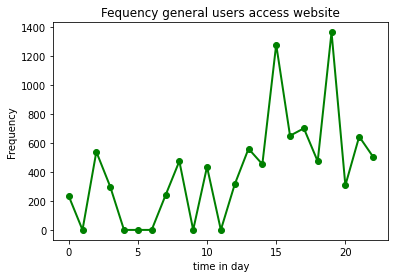

In [51]:
plt.plot([i for i in range(len(np.array(frequence)[:, 0]))], np.array(frequence)[:, 0], 'go-', linewidth=2)
plt.title("Fequency general users access website")
plt.xlabel("time in day")
plt.ylabel("Frequency");

We can consider the most of general users access website between 14:00 to 20:00 

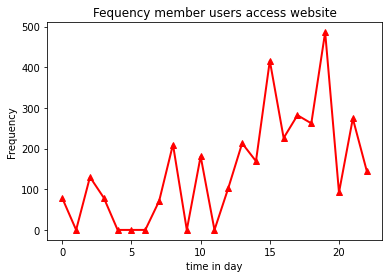

In [52]:
plt.plot([i for i in range(len(np.array(frequence)[:, 1]))], np.array(frequence)[:, 1], 'r-^', linewidth=2)
plt.title("Fequency member users access website")
plt.xlabel("time in day")
plt.ylabel("Frequency");

We can consider the most of member users access website between 14:00 to 20:00 

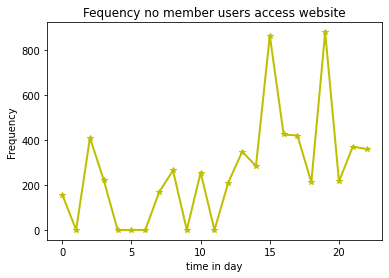

In [53]:
plt.plot([i for i in range(len(np.array(frequence)[:, 2]))], np.array(frequence)[:, 2], 'y-*', linewidth=2)
plt.title("Fequency no member users access website")
plt.xlabel("time in day")
plt.ylabel("Frequency");

We can consider the most of no registry users access website between 14:00 to 20:00 

#  Next step i will choose game website to analysing these variables

In [54]:
games = data[data['url'].str.contains('games:').fillna(False)]

In [55]:
games

,member_id,browser_id,register_id,url,second_per_day
date_time,,,,,
2020-08-08 19:32:18+00:00,NaN,4.830000e+37,NaN,games:/games/bubble-dragons,0
2020-08-08 19:03:08+00:00,5.131951e+09,3.050000e+37,34999201.0,games:/games/forty-thieves-solitaire,0
2020-08-08 19:37:28+00:00,1.473905e+09,4.860000e+37,94842213.0,games:/games/mahjongg-solitaire,0
2020-08-08 19:03:07+00:00,NaN,3.150000e+37,NaN,games:/games/backgammon,0
2020-08-08 19:55:12+00:00,NaN,4.980000e+37,NaN,games:/games/classic-solitaire,0
...,...,...,...,...,...
2020-10-07 00:00:23+00:00,4.050994e+09,8.290000e+36,93464516.0,games:/games/ballistic,0
2020-10-07 00:01:21+00:00,NaN,1.840000e+35,NaN,games:/category/all-games,0
2020-10-07 00:00:45+00:00,NaN,7.460000e+35,NaN,games:/games/jigsaw,0


In [56]:
frequence = []
for i in range(23):
    temp = games.between_time('{}:00'.format(i), '{}:00'.format(i+1))
    frequence.append([len(temp['member_id']), len(temp['member_id'].dropna()), 
                      len(temp['member_id']) - len(temp['member_id'].dropna())])

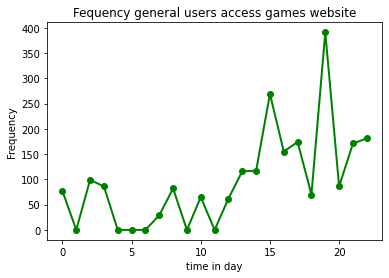

In [57]:
plt.plot([i for i in range(len(np.array(frequence)[:, 0]))], np.array(frequence)[:, 0], 'go-', linewidth=2)
plt.title("Fequency general users access games website")
plt.xlabel("time in day")
plt.ylabel("Frequency");

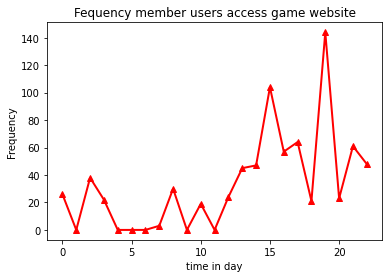

In [58]:
plt.plot([i for i in range(len(np.array(frequence)[:, 1]))], np.array(frequence)[:, 1], 'r-^', linewidth=2)
plt.title("Fequency member users access game website")
plt.xlabel("time in day")
plt.ylabel("Frequency");

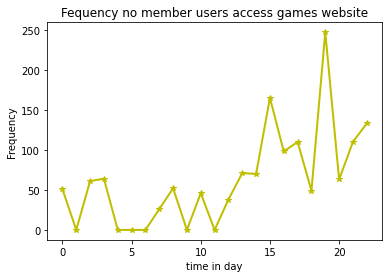

In [59]:
plt.plot([i for i in range(len(np.array(frequence)[:, 2]))], np.array(frequence)[:, 2], 'y-*', linewidth=2)
plt.title("Fequency no member users access games website")
plt.xlabel("time in day")
plt.ylabel("Frequency");